In [1]:
# 相關套件載入
import pandas as pd
import numpy as np
import random as rn
import pydotplus # 繪製tensflow圖
import graphviz # 繪製tensflow圖


from tensorflow.keras.layers import Embedding, Dropout, Input, Dense, Reshape, Concatenate
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model

In [9]:
# 資料讀取(此資料已經過前處理)
df = pd.read_excel('C:/Users/hsu/Desktop/tel.xlsx')
tel = df.copy()

In [10]:
# 將目標變數轉為EE運作格式
ty = np.array([i for i in tel['churn']]).reshape(3333,1)

In [11]:
t = tel.drop('churn', axis = 1)

In [12]:
t.shape

(3333, 18)

In [20]:
tel.head()

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,17,0,0,1,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,0
1,5,0,0,1,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,0
2,18,0,0,0,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,0
3,5,2,1,0,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354,0
4,34,0,1,0,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641,0


In [14]:
# 將特徵變數轉為EE運作格式
tx = []
for i in t.columns:
    f = np.array([j for j in t[i]]).reshape(3333,1)
    tx.append(f)

In [21]:
# 撰寫EE運作函數
sample_num = 3333 # 觀察值為32
cate_feature_num = 4 # 類別特徵 2
contious_feature_num = 14 # 數值特徵 1
cate_embedding_dimension = {'0':10, '1':4, '2':3, '3':3}
 
def build_embedding_network():
 
    '''
    通常寫法會將dataframe資料調整，將類別變數放置dataframe前面位置
    ''' 
    
    inputs = []
    embeddings = []
    
    ### 所有dataframe的特徵都需寫進行E.E中，一個資料集如有3個欄位(2個類別特徵，1個數值特徵)
    ### 就必須寫3次。通常為了後續容易了解，我們先將類別的向量嵌入寫在前面，
    ### 而且需增加Embedding嵌入資料，再用Reshape拉直。
    ### 數值資料只需增加Dense
    
    input_cate_feature_1 = Input(shape=(1,))
    embedding = Embedding(51, 10, input_length=1, name = 'EE_C1')(input_cate_feature_1) # name可以命名該層名稱
    # embedding後是10*1*3，為了後續计算方便，因此使用Reshape轉為10*3(易使後續concat)
    embedding = Reshape(target_shape=(10,))(embedding)
    inputs.append(input_cate_feature_1)
    embeddings.append(embedding)
    
    input_cate_feature_2 = Input(shape=(1,))
    embedding = Embedding(3, 4, input_length=1)(input_cate_feature_2)
    embedding = Reshape(target_shape=(4,))(embedding)
    inputs.append(input_cate_feature_2)
    embeddings.append(embedding)
    
    input_cate_feature_3 = Input(shape=(1,))
    embedding = Embedding(2, 3, input_length=1)(input_cate_feature_3)
    embedding = Reshape(target_shape=(3,))(embedding)
    inputs.append(input_cate_feature_3)
    embeddings.append(embedding)
    
    input_cate_feature_4 = Input(shape=(1,))
    embedding = Embedding(2, 3, input_length=1)(input_cate_feature_4)
    embedding = Reshape(target_shape=(3,))(embedding)
    inputs.append(input_cate_feature_4)
    embeddings.append(embedding)
    
    input_numeric1 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric1) 
    inputs.append(input_numeric1)
    embeddings.append(embedding_numeric)
    
    input_numeric2 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric2) 
    inputs.append(input_numeric2)
    embeddings.append(embedding_numeric)
    
    input_numeric3 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric3) 
    inputs.append(input_numeric3)
    embeddings.append(embedding_numeric)
    
    input_numeric4 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric4) 
    inputs.append(input_numeric4)
    embeddings.append(embedding_numeric)
    
    input_numeric5 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric5) 
    inputs.append(input_numeric5)
    embeddings.append(embedding_numeric)
    
    input_numeric6 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric6) 
    inputs.append(input_numeric6)
    embeddings.append(embedding_numeric)
    
    input_numeric7 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric7) 
    inputs.append(input_numeric7)
    embeddings.append(embedding_numeric)
    
    input_numeric8 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric8) 
    inputs.append(input_numeric8)
    embeddings.append(embedding_numeric)
    
    input_numeric9 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric9) 
    inputs.append(input_numeric9)
    embeddings.append(embedding_numeric)
    
    input_numeric10 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric10) 
    inputs.append(input_numeric10)
    embeddings.append(embedding_numeric)
    
    input_numeric11 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric11) 
    inputs.append(input_numeric11)
    embeddings.append(embedding_numeric)
    
    input_numeric12 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric12) 
    inputs.append(input_numeric12)
    embeddings.append(embedding_numeric)
    
    input_numeric13 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric13) 
    inputs.append(input_numeric13)
    embeddings.append(embedding_numeric)
    
    input_numeric14 = Input(shape=(1,))
    embedding_numeric = Dense(1)(input_numeric14) 
    inputs.append(input_numeric14)
    embeddings.append(embedding_numeric)
    
    
    

 
    # 此一過程，再於將所有嵌入後的類別資料以及數值資料(不需調整)，拉成一條
    x = Concatenate()(embeddings)
    
    # 經過二層Dense
    x = Dense(10, activation='relu')(x)
    #x = Dropout(.15)(x)
    x = Dense(10, activation='relu')(x)
    #x = Dropout(.15)(x)
    
    # 最後進行output輸出
    output = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs, output)
 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    
    return model

In [24]:
ty

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [26]:
# 訓練模型
NN = build_embedding_network()
NN.fit(tx, ty, epochs=30, batch_size=50, verbose=1)

Train on 3333 samples
Epoch 1/30
3333/3333 [==============================] - 3s 933us/sample - loss: 0.6224 - accuracy: 0.6847
Epoch 2/30
3333/3333 [==============================] - 0s 125us/sample - loss: 0.4420 - accuracy: 0.8578
Epoch 3/30
3333/3333 [==============================] - 0s 119us/sample - loss: 0.3768 - accuracy: 0.8593
Epoch 4/30
3333/3333 [==============================] - 0s 122us/sample - loss: 0.3509 - accuracy: 0.8734
Epoch 5/30
3333/3333 [==============================] - 0s 130us/sample - loss: 0.3307 - accuracy: 0.8836
Epoch 6/30
3333/3333 [==============================] - 0s 112us/sample - loss: 0.3161 - accuracy: 0.8911
Epoch 7/30
3333/3333 [==============================] - 0s 123us/sample - loss: 0.3022 - accuracy: 0.8941
Epoch 8/30
3333/3333 [==============================] - 0s 124us/sample - loss: 0.2880 - accuracy: 0.8953 - loss: 0.2876 - accuracy: 0.89
Epoch 9/30
3333/3333 [==============================] - 0s 129us/sample - loss: 0.2683 - accuracy:

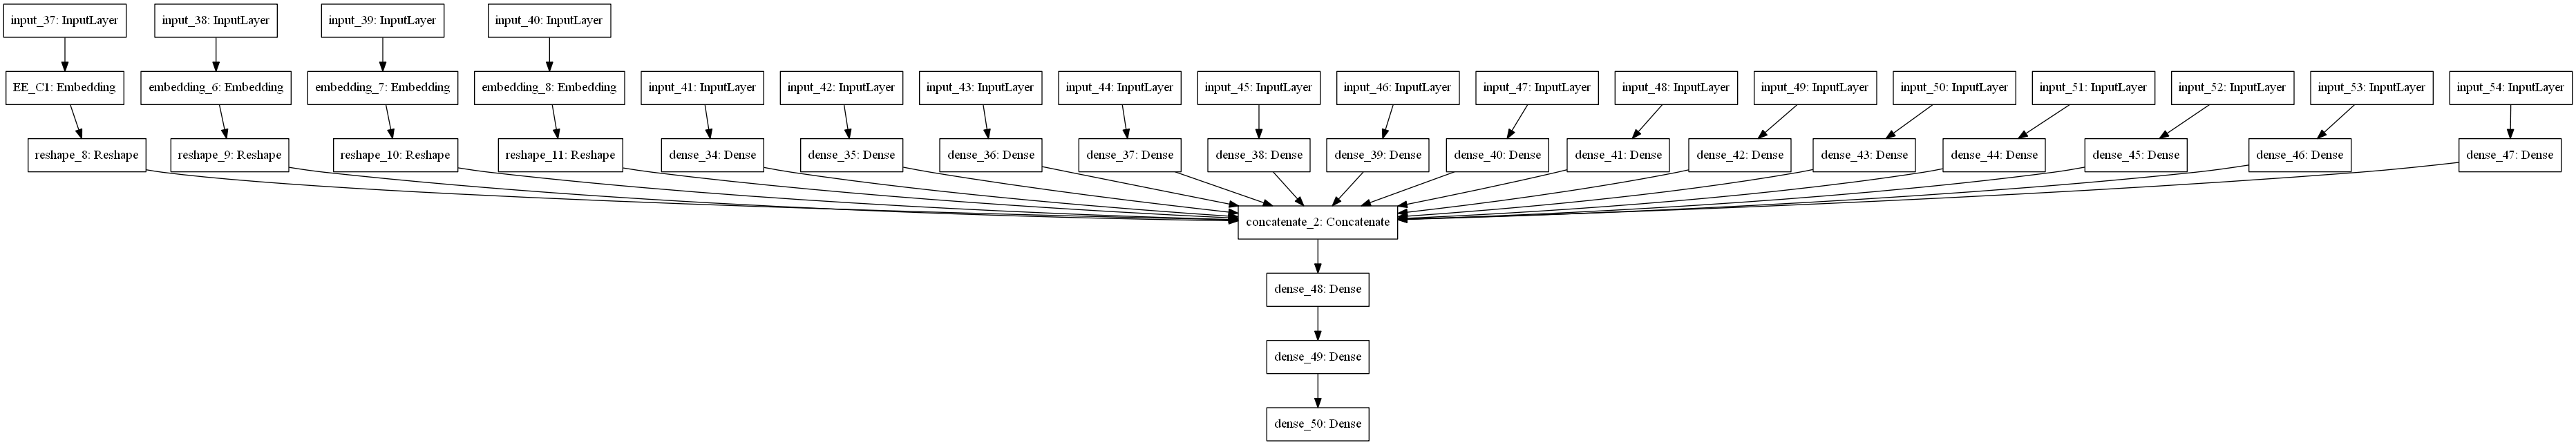

In [27]:
# 輸出EE張量
import graphviz
import pydotplus

from tensorflow.keras.utils import plot_model
plot_model(NN, to_file='NN.png', show_layer_names=True)
# plot_model(NN, to_file='NN.png', show_shapes=True, show_layer_names=True) 完整寫法

In [31]:
# 取出嵌入向量資料

model = NN  # 將訓練完成的模型存成物件
for i in range(cate_feature_num):
    # 由NN.png圖可知，如果把類別特徵放置在前、連續特徵放於後，cate_feature_num+i就是所有embedding層
    layer_name = NN.get_config()['layers'][cate_feature_num+i]['name']
 
    intermediate_layer_model = Model(inputs=NN.input,
                                     outputs=model.get_layer(layer_name).output)
    
    # numpy.array
    intermediate_output = intermediate_layer_model.predict(tx)
    
    intermediate_output.resize([3333,cate_embedding_dimension[str(i)]])
    
    if i == 0:
        X_embedding_trans = intermediate_output
    else:
        X_embedding_trans = np.hstack((X_embedding_trans,intermediate_output)) #水平拼接
    

# 取出原來的數值特徵
for i in range(contious_feature_num):
    if i == 0:
        X_contious = tx[cate_feature_num+i]
    else:
        X_contious = np.hstack((X_contious,tx[cate_feature_num+i]))

In [35]:
# 將實體嵌入(EE)資料與原先數值資料合為dataframe資料格式
X_trans = np.hstack((X_embedding_trans,X_contious))
eedf = pd.DataFrame(X_trans)

In [ ]:
eedf.head()

In [50]:
# 將資料存出
eedf.to_excel('C:/Users/hsu/Desktop/eetel.xlsx', index=False)

In [37]:
eedf.shape

(3333, 34)

# 透過深度學習建立模型

In [36]:
model = Sequential()


In [85]:
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Dense(units=10, activation='tanh', input_dim = 34))
model.add(Dense(units=10, activation='tanh', activity_regularizer=l2(l=0.01)))
model.add(Dense(units=2, activation='softmax'))

In [86]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
lossS = SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=lossS,
              metrics = ['accuracy'])

In [49]:
eedf = pd.concat([eedf,df[['churn']]],axis = 1)

In [51]:
from sklearn.model_selection import train_test_split

In [55]:
X = eedf.drop('churn', axis = 1)
y = eedf['churn']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

In [89]:
model.fit(X_train, y_train,
         batch_size=50,
         epochs=30,
         validation_data=(X_test, y_test))

Train on 2333 samples, validate on 1000 samples
Epoch 1/30
2333/2333 [==============================] - 0s 48us/sample - loss: 0.4158 - accuracy: 0.9126 - val_loss: 0.4167 - val_accuracy: 0.9080
Epoch 2/30
2333/2333 [==============================] - 0s 47us/sample - loss: 0.4153 - accuracy: 0.9134 - val_loss: 0.4164 - val_accuracy: 0.9070
Epoch 3/30
2333/2333 [==============================] - 0s 71us/sample - loss: 0.4152 - accuracy: 0.9121 - val_loss: 0.4167 - val_accuracy: 0.9080
Epoch 4/30
2333/2333 [==============================] - 0s 64us/sample - loss: 0.4150 - accuracy: 0.9143 - val_loss: 0.4164 - val_accuracy: 0.9080
Epoch 5/30
2333/2333 [==============================] - 0s 70us/sample - loss: 0.4149 - accuracy: 0.9130 - val_loss: 0.4163 - val_accuracy: 0.9090
Epoch 6/30
2333/2333 [==============================] - 0s 79us/sample - loss: 0.4146 - accuracy: 0.9117 - val_loss: 0.4161 - val_accuracy: 0.9070
Epoch 7/30
2333/2333 [==============================] - 0s 73us/sample

In [90]:
y_pred = model.predict(X_test)

In [91]:
y_pred2 = np.argmax(y_pred,axis = 1)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [92]:
accuracy_score(y_test, y_pred2)

0.909

In [93]:
confusion_matrix(y_test, y_pred2)

array([[846,   9],
       [ 82,  63]], dtype=int64)

In [94]:
f1_score(y_test, y_pred2)

0.5806451612903225